# DL Pac 2B

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

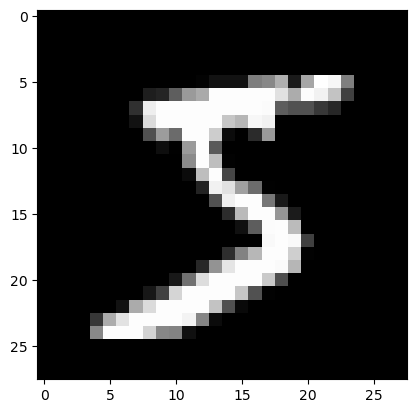

In [24]:
plt.imshow(x_train[0], cmap='gray')
plt.show() 

In [25]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# Reshape the data to fit the model
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 

In [10]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [12]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal andzeros elsewhere

In [13]:
y_test = np.eye(num_classes)[y_test] 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add (Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu'))

In [14]:
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
# Compile the model
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])

In [16]:
# Train the model
batch_size = 128

In [19]:
# Set the verbose parameter to 0 during training to suppress unnecessary output
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,  # Set verbose to 0 to suppress output
                    validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09356261044740677
Test accuracy: 0.98580002784729
